<a href="https://colab.research.google.com/github/AlexsonT/Growdev/blob/main/Ex_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte link.

# Os campos são:
# Rank: posição no ranking de vendas
# Name: nome do jogo
# Platform: plataforma/console
# Year: ano de lançamento
# Genre: gênero
# Publisher: empresa que publicou o jogo
# NA_Sales: vendas na américa do norte (em milhões de dólares)
# EU_Sales: vendas na europa (em milhões de dólares)
# JP_Sales: vendas no japão (em milhões de dólares)
# Other_Sales: outras vendas (em milhões de dólares)
# Global_Sales: vendas globais (em milhões de dólares)

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#READING THE DATASET
data = pd.read_csv('vgsales.csv', encoding = 'UTF-8', sep = ',', header = 0)

data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [3]:
# 1) Qual foi o jogo mais vendido no mundo em 2010?
year_2010 = data.query('Year == 2010')
max_sale = year_2010['Global_Sales'].max()
res = year_2010.query(f'Global_Sales == {max_sale}')

display(res)
print('*'*130)
print(f"O jogo mais vendido no ano de 2010 foi: {res['Name']}")
print('*'*130)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11183,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


**********************************************************************************************************************************
O jogo mais vendido no ano de 2010 foi: 11183    Kinect Adventures!
Name: Name, dtype: object
**********************************************************************************************************************************


In [4]:
# 2) Qual foi o gênero mais vendido na américa do norte em 2005.

data_year_2005 = data.query('Year == 2005')
group_data = data_year_2005.groupby(['Genre']).sum()
group_data = group_data.sort_values(by='NA_Sales', ascending = False)
genre_max_sale = group_data['NA_Sales'].max()
genre_max_sale = group_data.query(f'NA_Sales == {genre_max_sale}')


print(genre_max_sale.iloc[0].name)

Action


In [5]:
# 3) Qual foi a empresa que mais vendeu de 2005 até 2016.

range = data.query('2005 <= Year <= 2016')
group_business = range.groupby(by='Publisher').sum()
business = group_business['Global_Sales'].max()
most_sold = group_business.query(f'Global_Sales == {business}')


display(most_sold.iloc[0].name)

'Nintendo'

In [6]:
# 4) Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.

year_and_genre = data.query('Year == 2008 & Genre == "Sports"')
group_name = year_and_genre.groupby('Name').sum()
less_sold = year_and_genre['Global_Sales'].min()
less_sold = year_and_genre.query(f'Global_Sales == {less_sold}')

print(less_sold['Name'])

9691                  Winning Post 7 Maximum 2008
9692                                 Fab 5 Soccer
9694    Major Dream: Major Wii Nagero! Gyroball!!
9696                  Winning Post 7 Maximum 2008
9705                                Family Jockey
9715                             G1 Jockey 4 2008
9731                             Summer Athletics
Name: Name, dtype: object


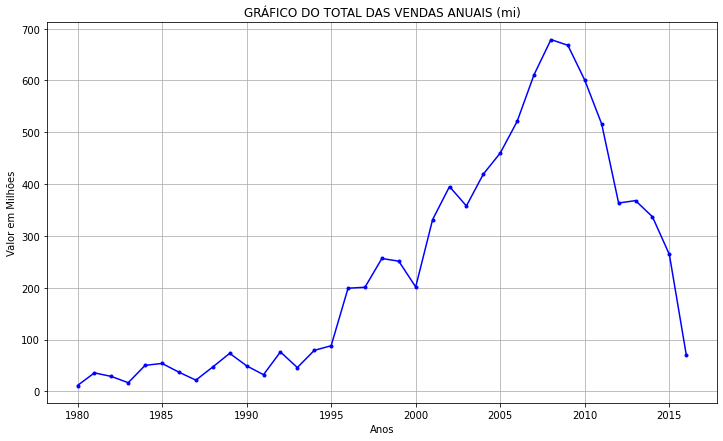

In [7]:
# 5) Mostre um gráfico com o total de vendas por ano.
group_year = data.groupby(by= 'Year').sum()

group_year['Global_Sales'].plot(figsize=(12,7), marker='.', grid=True, linestyle = 'solid', color = 'b', title='GRÁFICO DO TOTAL DAS VENDAS ANUAIS (mi)', xlabel="Anos", ylabel='Valor em Milhões')


**************************************************
RESPOSTA:


2009

**************************************************


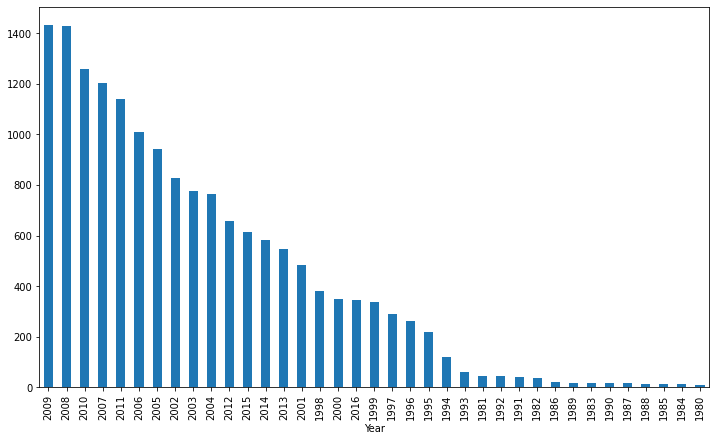

In [148]:
# 6) Qual foi o ano com mais lançamentos de jogos?

wich_releases = data.groupby('Year').count().sort_values('Rank', ascending=False)
wich_releases = wich_releases.filter(['Year', "Name"])

print('*'*50)
print('RESPOSTA:')
display(wich_releases.iloc[0].name)
print('*'*50)
wich_releases['Name'].plot.bar(figsize=(12,7))


In [164]:
# 7) Qual a plataforma que menos lançou jogos?

less = data.groupby('Platform').count().sort_values('Rank', ascending=False)

display(less.iloc[0].name)

'DS'

In [ ]:
# 8) Qual plataforma que mais gerou lucros com jogos do gênero Action desde 2009?

new_data = data.query('Genre == "Action" & Year >= 2009')
group_platform = new_data.groupby('Platform').sum('Global_Sales')
max_sales = group_platform['Global_Sales'].max()
max_profit = group_platform.query(f'Global_Sales == {max_sales}')

print(max_profit.iloc[0].name)

PS3


In [263]:
# 9) Qual empresa teve o maior lucro (sob o teto de 0.35 milhões) de 1980 até 1995, excluindo-se a plataforma SNES.

higher_profit = data.query('Platform != "SNES" & Year <= 1995')
higher_profit_sum = higher_profit.groupby('Publisher').sum()
higher_profit_035 = higher_profit_sum.query('Global_Sales <= 0.35')
higher_profit_sort = higher_profit_035.sort_values('Global_Sales', ascending=False)

display(higher_profit_sort.iloc[0].name)

'ITT Family Games'

In [ ]:
# 10)A empresa que mais lucrou no Japão em 2003 é a mesma que mais lucrou na europa nesse mesmo ano?

In [ ]:
# 11)Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?

In [ ]:
# 12)Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.

In [ ]:
# 13)Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.